In [3]:
import numpy as np
import matplotlib.pyplot as plt
import json

MODELS_FOLDER = "../models"

IMPL = "fixslice"
TARGET = "2sbox"
BYTE = 1
ARCH = "zhang"
SEED = 777

TRACE_START = 400
TRACE_END = 1500

MODEL_NAME = f"{IMPL}-{TARGET}-byte{BYTE}-{ARCH}-{TRACE_START}_{TRACE_END}-s{SEED}"

METADATA_PATH = f"{MODELS_FOLDER}/{MODEL_NAME}/metadata.json"

with open(METADATA_PATH, 'r') as f:

    metadata = json.load(f)

loss1, val_performance1 = metadata["scores"]

epochs = len(loss1)

In [20]:
MODELS_FOLDER = "../models"

IMPL = "fixslice"
TARGET = "2sbox..."
BYTE = 1
ARCH = "zhang"
SEED = 777

TRACE_START = 400
TRACE_END = 1500

MODEL_NAME = f"{IMPL}-{TARGET}-byte{BYTE}-{ARCH}-{TRACE_START}_{TRACE_END}-s{SEED}"

METADATA_PATH = f"{MODELS_FOLDER}/{MODEL_NAME}/metadata.json"

with open(METADATA_PATH, 'r') as f:

    metadata = json.load(f)

loss2, val_performance2 = metadata["scores"]

C:\Users\Ulrik\AppData\Local\Temp\ipykernel_10888\109963694.py:29: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ybound(0.0, 135.0)


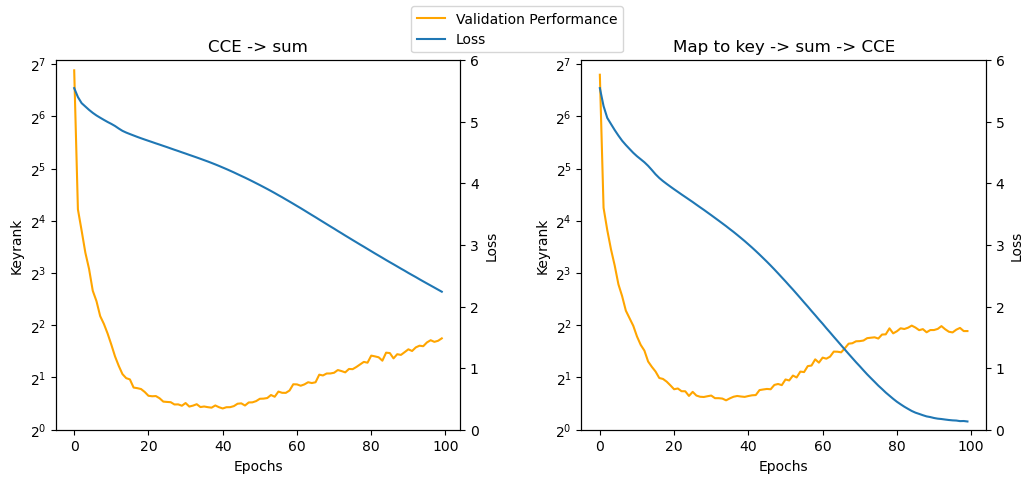

In [22]:
fig, axs = plt.subplots(1,2)
fig.set_figwidth(12.0)
plt.subplots_adjust(wspace=0.3)

#fig.set_tight_layout(tight=True)

labels_handles = {}

for ax, val, loss, title in zip(axs, [val_performance1, val_performance2], [loss1, loss2], ["CCE -> sum", "Map to key -> sum -> CCE"]):

    ax.set_title(title)

    val = np.array(val) + 1.0

    # Left side 
    l1, = ax.plot(np.arange(epochs), val, color="orange", label="Validation Performance")
    ax.set_yscale("log", base=2)


    # Right side
    ax2 = ax.twinx()
    l2, = ax2.plot(np.arange(epochs), loss,  label="Loss")

    ax.set_xlabel("Epochs")
    ax.set_ylabel("Keyrank")
    ax2.set_ylabel("Loss")

    # Scale
    ax.set_ybound(0.0, 135.0)
    ax2.set_ybound(0.0, 6.0)

    ax.set_yticks([2**n for n in range(8)])
    

    labels_handles[l1.get_label()] = l1
    labels_handles[l2.get_label()] = l2


fig.legend(labels_handles.values(), labels_handles.keys(), loc='upper center')



plt.show()